<a href="https://colab.research.google.com/github/RodrigoAcev/SA-PeruvianPresidentialCandidates/blob/main/TA_AnalisisSentimiento_MensajePresidencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m spacy download es_core_news_sm

     |████████████████████████████████| 16.2 MB 7.6 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [ ]:
import spacy
nlp = spacy.load("es_core_news_sm")

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import string

import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
stop_words_es = set(stopwords.words('spanish'))

In [ ]:
string.ascii_uppercase

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
no_points = string.punctuation.replace('.','')
no_points = no_points.replace(',','')
no_points

'!"#$%&\'()*+-/:;<=>?@[\\]^_`{|}~'

In [ ]:
def PreprocesaTexto(oracion):
    if type(oracion)!=str:
        return None
    else:
        for punct in string.punctuation:
            oracion = oracion.replace(punct, ' ')
        for mayus_l in string.ascii_uppercase:
            oracion = oracion.replace(mayus_l, f' {mayus_l}')
        oracion = oracion.replace('”', ' ')
        oracion = oracion.replace('“', ' ')

        oracion = oracion.lower() 
        doc = nlp(oracion)
        token_pro = [token.lemma_ for token in doc if not(token.text in stop_words_es)]
        token_pro = [tkn for tkn in token_pro if (tkn.isalpha())and(len(tkn)>1)]
        
        return ' '.join(token_pro)

In [ ]:
def CheckValid_word2(word):
    if ((word.isalpha())and(len(word)>1))or(word==',')or(word=='.'):
        return True
    else:
        return False

In [ ]:
def PreprocesaTexto_2(oracion):
    if type(oracion)!=str:
        return None
    else:
        for punct in no_points:
            oracion = oracion.replace(punct, ' ')
        for mayus_l in string.ascii_uppercase:
            oracion = oracion.replace(mayus_l, f' {mayus_l}')
        oracion = oracion.replace('”', ' ')
        oracion = oracion.replace('“', ' ')
        oracion = oracion.replace('.', ' . ')
        oracion = oracion.replace(',', ' , ')

        oracion = oracion.lower() 
        #doc = nlp(oracion)
        #token_pro = [token.lemma_ for token in doc if not(token.text in stop_words_es)]
        ##token_pro = [x for x in word_tokenize(oracion) if not(x in stop_words_es)]
        token_pro = oracion.split()
        token_pro = [tkn for tkn in token_pro if CheckValid_word2(tkn)]
        
        return ' '.join(token_pro)

In [ ]:
def GetKeyWords(doc, top_kw=5):
    #tokens_list
    tokens = word_tokenize(doc)
    freq = FreqDist(tokens)
    return np.array(freq.most_common(top_kw))[:,0]


In [ ]:
#!wget https://raw.githubusercontent.com/RodrigoAcev/SA-PeruvianPresidentialCandidates/main/larepublica_100.csv
!wget https://raw.githubusercontent.com/RodrigoAcev/SA-PeruvianPresidentialCandidates/main/TA_dataset.csv

--2021-08-01 01:37:21--  https://raw.githubusercontent.com/RodrigoAcev/SA-PeruvianPresidentialCandidates/main/TA_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2470815 (2.4M) [text/plain]
Saving to: ‘TA_dataset.csv’

TA_dataset.csv      100%[===================>]   2.36M  --.-KB/s    in 0.05s   

2021-08-01 01:37:21 (46.0 MB/s) - ‘TA_dataset.csv’ saved [2470815/2470815]



In [ ]:
df_raw = pd.read_csv('TA_dataset.csv')
df_raw.head(10).T.iloc[1:,:]

,0,1,2,3,4,5,6,7,8,9
site,diariocorreo,diariocorreo,diariocorreo,diariocorreo,diariocorreo,diariocorreo,diariocorreo,diariocorreo,diariocorreo,diariocorreo
publish_date,2021-07-29 23:55:16.656000+00:00,2021-07-29 23:48:20.264000+00:00,2021-07-29 23:27:32.719000+00:00,2021-07-29 23:27:10.005000+00:00,2021-07-29 23:05:02.514000+00:00,2021-07-29 21:03:14.998000+00:00,2021-07-29 20:52:33.355000+00:00,2021-07-29 20:11:01.618000+00:00,2021-07-29 19:40:18.175000+00:00,2021-07-29 18:48:45.293000+00:00
title,Pedro Castillo a delincuentes extranjeros: “Te...,María del Carmen Alva sobre Sagasti: “Le invit...,Keiko Fujimori a Pedro Castillo: “Seremos un m...,Francisco Sagasti fue denunciado por genocidio...,Julio Arbizu tilda de “primer grave error polí...,"Guido Bellido, el nuevo presidente del Consejo...",Congresistas opinaron sobre designación de Gui...,Juramentación de ministros será en el Gran Tea...,Pedro Castillo: “Seré el primero en sancionar ...,EN VIVO | Guido Bellido es el presidente del C...
content,Pedro Castillo anuncia que no gobernará desde ...,"La presidenta del Congreso, María del Carmen A...",“A 200 años de que lográramos una República li...,El presidente Francisco Sagasti fue denunciado...,Exprocurador que integró el equipo de transfer...,El nombrado titular de la PCM increpó en el de...,"Los legisladores de Juntos por el Perú, Avanza...",La ceremonia programada para el viernes 30 de ...,Presidente convocó a la población a estar vigi...,Esta tarde Bellido asumió al cargo en la Pampa...


In [ ]:
txt_sample = df_raw.loc[0,'content']
txt_sample[:300]

'Pedro Castillo anuncia que no gobernará desde Palacio de Gobierno. (Foto: Twitter \n@PedroCastilloTe Redacción Diario CorreoActualizado el 29/07/2021 06:55 p.m.El presidente de la República, Pedro Castillo, en su primer mensaje a la Nación, dio un plazo de 72 horas a todos los delincuentes extranjero'

In [ ]:
smp_pro = PreprocesaTexto(txt_sample)
smp_pro

'pedro castillo anunciar gobernar palacio gobernar foto twitter pedro castillo redacción diario correar actualizar página metro presidente república pedro castillo mensaje nación dar plazo hora delincuente extranjero salir país metro segundo jorge muñoz tras discursar pedro castillo preocupar temer ronderos decir anunciar realizar tras llegar congreso república juramentar cargar presidente república variedad temer tocar discursar mandatario referir seguridad ciudadano castillo terrón explicar problema población policía luchar mal suficiente pesar esforzar seguir campear banda robo callejero agregar explicar gobernar pensar expandir sistema rondar campesino perú coser población organizar dar seguridad convocar conformarlas existir aseverar mandatario página segundo partir morar indicar designación guido bellido titular página metro atento gobernabilidad agregar fortalecer ley rondar respetar autonomía lado castillo dar ultimátum delincuente extranjero ingresar país delinquir hora plazo 

In [ ]:
smp_pro = PreprocesaTexto_2(txt_sample)
smp_pro

'pedro castillo anuncia que no gobernará desde palacio de gobierno . foto twitter pedro castillo te redacción diario correo actualizado el . . el presidente de la república , pedro castillo , en su primer mensaje la nación , dio un plazo de horas todos los delincuentes extranjeros para que salgan del país . jorge muñoz tras discurso de pedro castillo me preocupa el tema de los ronderos dicho anuncio lo realizó tras su llegada al congreso de la república , donde juramentó al cargo de presidente de la república . entre la variedad de temas que tocó , en su primer discurso como mandatario , se refirió la seguridad ciudadana . castillo terrones explicó que esta es uno de los problemas más sentidos por la población . la policía lucha contra este mal pero eso no es suficiente . . . pese al esfuerzo , siguen campeando las bandas robos callejeros , agregó . en ese sentido , explicó que su gobierno piensa en expandir el sistemas de rondas campesinas en el perú . esto no es otra cosa que la pobl

In [ ]:
GetKeyWords(smp_pro)

array(['de', '.', ',', 'la', 'que'], dtype='<U3')

In [ ]:
df_raw['Pro_text'] = df_raw['content'].apply(PreprocesaTexto)
df_raw['Keywords'] = df_raw['Pro_text'].apply(GetKeyWords)
df_raw['Texto_puntos'] = df_raw['content'].apply(PreprocesaTexto_2)
df_raw.head(10).T

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
site,diariocorreo,diariocorreo,diariocorreo,diariocorreo,diariocorreo,diariocorreo,diariocorreo,diariocorreo,diariocorreo,diariocorreo
publish_date,2021-07-29 23:55:16.656000+00:00,2021-07-29 23:48:20.264000+00:00,2021-07-29 23:27:32.719000+00:00,2021-07-29 23:27:10.005000+00:00,2021-07-29 23:05:02.514000+00:00,2021-07-29 21:03:14.998000+00:00,2021-07-29 20:52:33.355000+00:00,2021-07-29 20:11:01.618000+00:00,2021-07-29 19:40:18.175000+00:00,2021-07-29 18:48:45.293000+00:00
title,Pedro Castillo a delincuentes extranjeros: “Te...,María del Carmen Alva sobre Sagasti: “Le invit...,Keiko Fujimori a Pedro Castillo: “Seremos un m...,Francisco Sagasti fue denunciado por genocidio...,Julio Arbizu tilda de “primer grave error polí...,"Guido Bellido, el nuevo presidente del Consejo...",Congresistas opinaron sobre designación de Gui...,Juramentación de ministros será en el Gran Tea...,Pedro Castillo: “Seré el primero en sancionar ...,EN VIVO | Guido Bellido es el presidente del C...
content,Pedro Castillo anuncia que no gobernará desde ...,"La presidenta del Congreso, María del Carmen A...",“A 200 años de que lográramos una República li...,El presidente Francisco Sagasti fue denunciado...,Exprocurador que integró el equipo de transfer...,El nombrado titular de la PCM increpó en el de...,"Los legisladores de Juntos por el Perú, Avanza...",La ceremonia programada para el viernes 30 de ...,Presidente convocó a la población a estar vigi...,Esta tarde Bellido asumió al cargo en la Pampa...
Pro_text,pedro castillo anunciar gobernar palacio gober...,presidente congreso maría carmen alva responde...,año lograr república librar hoy deber ratifica...,presidente francisco sagasti denunciar excongr...,exprocurador integrar equipar transferencia mi...,nombrar titular página metro increpar detrás c...,legislador junto perú avanzar país forzar popu...,ceremonia programar viernes julio realizar hoy...,presidente convocar población vigilante autori...,tardar bellido asumir cargar pampa quinua ayac...
Keywords,"[castillo, pedro, página, metro, segundo]","[banda, congreso, presidente, sagasti, alva]","[fujimori, keiko, pedro, castillo, nuevo]","[sagasti, francisco, denunciar, ministro, metro]","[guido, bellido, gobernar, espantar, consenso]","[página, sendero, luminoso, edith, lago]","[bellido, página, guido, país, popular]","[metro, julio, página, ceremonia, gran]","[trabajar, perú, convocar, autoridad, país]","[segundo, metro, litro, bellido, partir]"
Texto_puntos,pedro castillo anuncia que no gobernará desde ...,"la presidenta del congreso , maría del carmen ...","años de que lográramos una república libre , h...",el presidente francisco sagasti fue denunciado...,exprocurador que integró el equipo de transfer...,el nombrado titular de la increpó en el detrás...,"los legisladores de juntos por el perú , avanz...",la ceremonia programada para el viernes de jul...,presidente convocó la población estar vigilant...,esta tarde bellido asumió al cargo en la pampa...


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    631 non-null    int64 
 1   site          631 non-null    object
 2   publish_date  631 non-null    object
 3   title         631 non-null    object
 4   content       631 non-null    object
 5   Pro_text      631 non-null    object
 6   Keywords      631 non-null    object
 7   Texto_puntos  631 non-null    object
dtypes: int64(1), object(7)
memory usage: 39.6+ KB


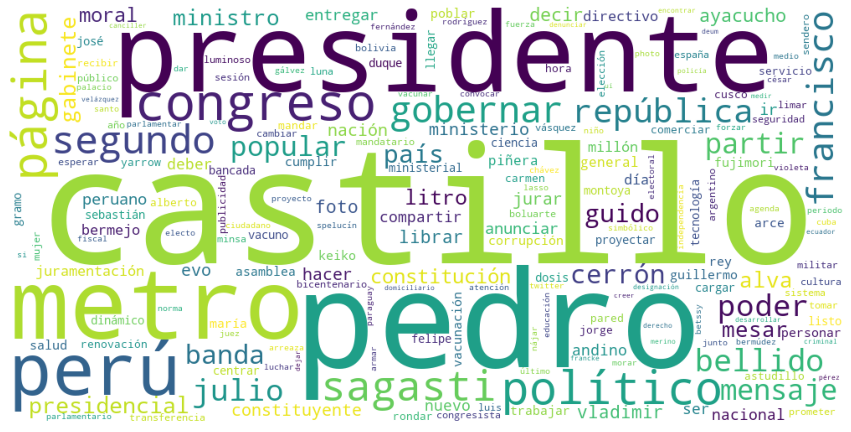

In [ ]:
kw_top5 = df_raw['Keywords'].values
kws_all = []
for kw_i in kw_top5:
    kws_all.extend(kw_i)

from collections import Counter
word_could_dict=Counter(kws_all)

wordcloud = WordCloud(background_color='white', width = 1000, height = 500, random_state=123).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

plt.savefig('./WordCloud_v1.png')
plt.close()

In [ ]:
def GraficaHistogramTokens(token_list, top_len=30, titulo=''):
    
    word_could_dict=Counter(token_list)
    labels, values = zip(*word_could_dict.items())

    # sort your values in descending order
    indSort = np.argsort(values)[::-1]

    # rearrange your data
    labels = np.array(labels)[indSort][:top_len]
    values = np.array(values)[indSort][:top_len]

    indexes = np.arange(len(labels))[:top_len]

    bar_width = 1


    fig, axs = plt.subplots(figsize=(22,8))

    axs.bar(indexes,values)
    #plt.bar(indexes, values)

    # add labels
    axs.set_xticks(indexes)
    axs.set_xticklabels(labels, rotation='vertical')
    axs.set_title(titulo)
    plt.show()

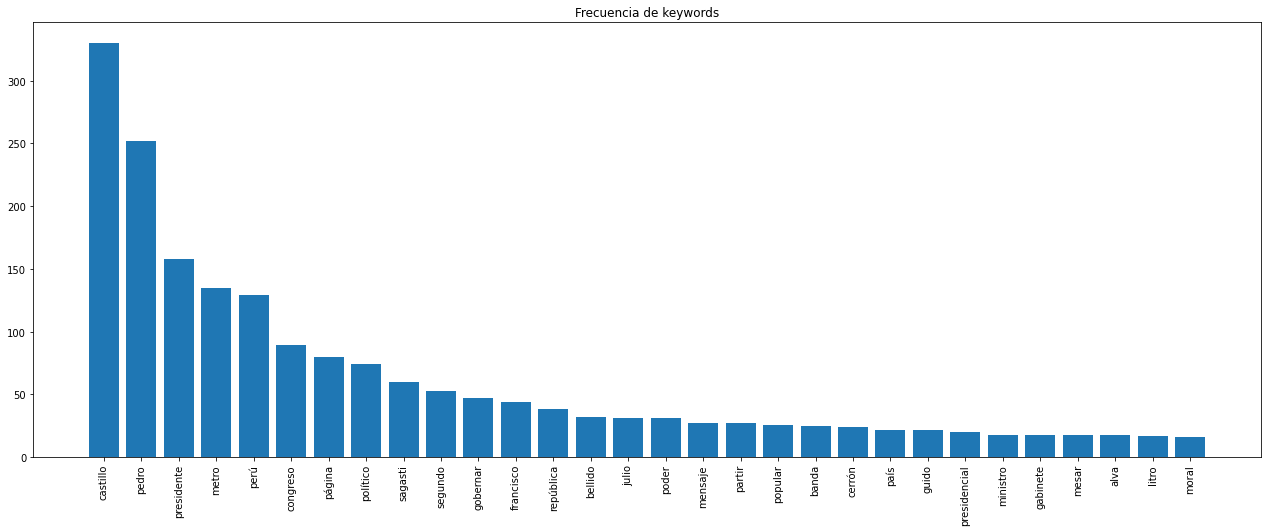

In [ ]:
GraficaHistogramTokens(kws_all, titulo='Frecuencia de keywords')

In [ ]:
#total_content = ' '.join(df_raw['Pro_text'].values)
#total_doc = nlp(total_content)

#print(f'Cantidad total de palabras: {len(total_doc)}')

In [ ]:
#tokens = [x.text for x in total_doc]
#tokens[:5]

In [ ]:
#uniq_tokens = []
#for tk_i  in tokens:
#    if not(tk_i in uniq_tokens):
#        uniq_tokens.append(tk_i)
#print(f'Tanaño de vocabulario: {len(uniq_tokens)}')

In [ ]:
#freq = FreqDist(tokens)
#np.array(freq.most_common(10))

In [ ]:
#print(f'Cantidad total de palabras: {len(total_doc)}')
#print(f'Tanaño de vocabulario: {len(uniq_tokens)}')
#GraficaHistogramTokens(tokens, top_len=30, titulo='Frecuencia para todo el corpus')


## Sentiment analysis spanish
Usa NaiveBayes para la estimación del sentimiento de oraciones, link: https://github.com/sentiment-analysis-spanish/sentiment-spanish

In [ ]:
!pip install sentiment_analysis_spanish

     |████████████████████████████████| 30.0 MB 68 kB/s 


In [ ]:
from sentiment_analysis_spanish import sentiment_analysis
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
print(sentiment.sentiment('Esta es una mala prueba'))

0.00021489499084814375


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
print(sentiment.sentiment('Esta es una buena prueba'))

0.4830808209941375


In [ ]:
def prom_sent (texto):
  sentences = sent_tokenize(texto)
  sentences
  sentences_prep = [sentiment.sentiment(sent) for sent in sentences]
  sentences_prep
  sent_prom = sum(sentences_prep)/ len(sentences_prep)
  return sent_prom

In [ ]:

df_raw['score_pre'] = df_raw['Texto_puntos'].apply(prom_sent)

mean_sc = df_raw['score_pre'].mean()
std_sc = df_raw['score_pre'].std()

df_raw['score'] = (df_raw['score_pre']-mean_sc)/std_sc
df_raw.head(10)

,Unnamed: 0,site,publish_date,title,content,Pro_text,Keywords,Texto_puntos,score_pre,score
0,0,diariocorreo,2021-07-29 23:55:16.656000+00:00,Pedro Castillo a delincuentes extranjeros: “Te...,Pedro Castillo anuncia que no gobernará desde ...,pedro castillo anunciar gobernar palacio gober...,"[castillo, pedro, página, metro, segundo]",pedro castillo anuncia que no gobernará desde ...,0.195921,0.340521
1,1,diariocorreo,2021-07-29 23:48:20.264000+00:00,María del Carmen Alva sobre Sagasti: “Le invit...,"La presidenta del Congreso, María del Carmen A...",presidente congreso maría carmen alva responde...,"[banda, congreso, presidente, sagasti, alva]","la presidenta del congreso , maría del carmen ...",0.224760,0.708929
2,2,diariocorreo,2021-07-29 23:27:32.719000+00:00,Keiko Fujimori a Pedro Castillo: “Seremos un m...,“A 200 años de que lográramos una República li...,año lograr república librar hoy deber ratifica...,"[fujimori, keiko, pedro, castillo, nuevo]","años de que lográramos una república libre , h...",0.066642,-1.311019
3,3,diariocorreo,2021-07-29 23:27:10.005000+00:00,Francisco Sagasti fue denunciado por genocidio...,El presidente Francisco Sagasti fue denunciado...,presidente francisco sagasti denunciar excongr...,"[sagasti, francisco, denunciar, ministro, metro]",el presidente francisco sagasti fue denunciado...,0.108913,-0.771007
4,4,diariocorreo,2021-07-29 23:05:02.514000+00:00,Julio Arbizu tilda de “primer grave error polí...,Exprocurador que integró el equipo de transfer...,exprocurador integrar equipar transferencia mi...,"[guido, bellido, gobernar, espantar, consenso]",exprocurador que integró el equipo de transfer...,0.109091,-0.768743
5,5,diariocorreo,2021-07-29 21:03:14.998000+00:00,"Guido Bellido, el nuevo presidente del Consejo...",El nombrado titular de la PCM increpó en el de...,nombrar titular página metro increpar detrás c...,"[página, sendero, luminoso, edith, lago]",el nombrado titular de la increpó en el detrás...,0.082416,-1.109505
6,6,diariocorreo,2021-07-29 20:52:33.355000+00:00,Congresistas opinaron sobre designación de Gui...,"Los legisladores de Juntos por el Perú, Avanza...",legislador junto perú avanzar país forzar popu...,"[bellido, página, guido, país, popular]","los legisladores de juntos por el perú , avanz...",0.052929,-1.486208
7,7,diariocorreo,2021-07-29 20:11:01.618000+00:00,Juramentación de ministros será en el Gran Tea...,La ceremonia programada para el viernes 30 de ...,ceremonia programar viernes julio realizar hoy...,"[metro, julio, página, ceremonia, gran]",la ceremonia programada para el viernes de jul...,0.239125,0.892448
8,8,diariocorreo,2021-07-29 19:40:18.175000+00:00,Pedro Castillo: “Seré el primero en sancionar ...,Presidente convocó a la población a estar vigi...,presidente convocar población vigilante autori...,"[trabajar, perú, convocar, autoridad, país]",presidente convocó la población estar vigilant...,0.074946,-1.204935
9,9,diariocorreo,2021-07-29 18:48:45.293000+00:00,EN VIVO | Guido Bellido es el presidente del C...,Esta tarde Bellido asumió al cargo en la Pampa...,tardar bellido asumir cargar pampa quinua ayac...,"[segundo, metro, litro, bellido, partir]",esta tarde bellido asumió al cargo en la pampa...,0.081184,-1.125245


In [ ]:
df_raw[['score_pre', 'score']].describe()

,score_pre,score
count,631.000000,6.310000e+02
mean,0.169266,1.017235e-15
std,0.078278,1.000000e+00
min,0.000262,-2.159031e+00
25%,0.113068,-7.179316e-01
50%,0.161142,-1.037816e-01
75%,0.212292,5.496524e-01
max,0.475127,3.907373e+00


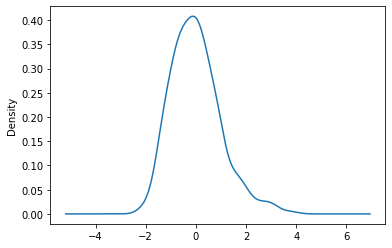

In [ ]:
df_raw['score'].plot.kde()

In [ ]:
import seaborn as sns

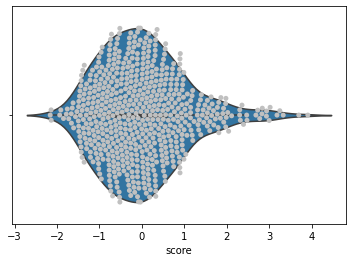

In [ ]:
ax = sns.violinplot(x="score", data=df_raw)
ax = sns.swarmplot(x="score", color='silver',data=df_raw)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


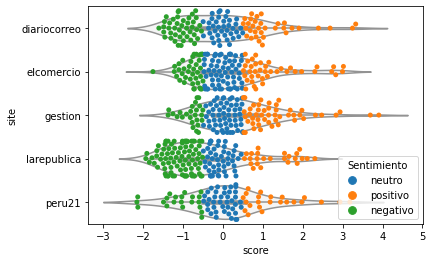

In [ ]:
down_lim = df_raw['score'].quantile(.25)
up_lim = df_raw['score'].quantile(.75)

df_raw['Sentimiento'] = df_raw['score'].apply(lambda x: 'positivo' if x>=.5 else 'negativo' if x<=-.5 else 'neutro')

ax = sns.violinplot(x="score", y='site', color='whitesmoke', data=df_raw)
ax = sns.swarmplot(x="score", y='site', hue='Sentimiento', data=df_raw)

In [ ]:
df_raw['Sentimiento'].value_counts()

neutro      246
negativo    215
positivo    170
Name: Sentimiento, dtype: int64

In [ ]:
df_gr = df_raw[['site', 'Sentimiento', 'score']].groupby(['site', 'Sentimiento'], as_index=True).count()

df_gr['% del diario'] = df_gr['score']/df_raw.groupby('site')['score'].count()*100
df_gr['% del Total'] = df_gr['score']/df_raw['score'].count()*100
df_gr.rename(columns={'score':' # Muestras'}, inplace=True)

df_gr

# Muestras  % del diario  % del Total
site         Sentimiento                                        
diariocorreo negativo              43     37.391304     6.814580
             neutro                39     33.913043     6.180666
             positivo              33     28.695652     5.229794
elcomercio   negativo              39     27.464789     6.180666
             neutro                63     44.366197     9.984152
             positivo              40     28.169014     6.339144
gestion      negativo              25     19.083969     3.961965
             neutro                56     42.748092     8.874802
             positivo              50     38.167939     7.923930
larepublica  negativo              87     54.716981    13.787639
             neutro                48     30.188679     7.606973
             positivo              24     15.094340     3.803487
peru21       negativo              21     25.000000     3.328051
             neutro                40     47.619048     6.339144
             positivo              23     27.380952     3.645008

In [ ]:
df_gr = df_raw[['Sentimiento', 'score']].groupby(['Sentimiento'], as_index=True).count()

#df_gr['% del diario'] = df_gr['score']/df_raw.groupby('site')['score'].count()*100
df_gr['% del Total'] = df_gr['score']/df_raw['score'].count()*100
df_gr.rename(columns={'score':' # Muestras'}, inplace=True)

df_gr

,# Muestras,% del Total
Sentimiento,,
negativo,215,34.072900
neutro,246,38.985737
positivo,170,26.941363


## Transformer & Lexicon-based approach

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 7.6 MB/s 
     |████████████████████████████████| 3.3 MB 50.4 MB/s 
     |████████████████████████████████| 636 kB 38.3 MB/s 
     |████████████████████████████████| 895 kB 50.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.2 MB 8.6 MB/s 


In [ ]:
from transformers import pipeline

translator = pipeline('translation_en_to_es', model='Helsinki-NLP/opus-mt-en-es')

In [ ]:
#Descargar sentiment lexicon en ingles
from urllib.request import urlopen

lx = {}

for line in urlopen('https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-en-165.txt'):
    text = line.decode("latin-1").replace('\n', '')
    (key, val) = text.split('\t')
    lx[key] = int(val)

In [ ]:
len(lx.keys())

3382

Este ejercicio se realizó con anterioridad, solo es necesario descargar el diccionario traducido



In [ ]:
#Traducir el lexicon a español:

#lx_es = {}

#for k_i in list(lx.keys()):
#    lemm_key = nlp(translator(k_i)[0]['translation_text'])[0].lemma_.lower()
#    if len(lemm_key)<2:
#        continue
#    lx_es[lemm_key] = lx[k_i]

In [ ]:
import pickle


#Guardar lexicon traducido
#pickle.dump(lx_es, open('lexicon_es_v1.txt', 'wb'))

In [ ]:
!wget -O lexicon_es_v1.txt https://github.com/RodrigoAcev/SA-PeruvianPresidentialCandidates/blob/main/lexicon_es_v1.txt?raw=true

--2021-08-01 01:40:40--  https://github.com/RodrigoAcev/SA-PeruvianPresidentialCandidates/blob/main/lexicon_es_v1.txt?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/RodrigoAcev/SA-PeruvianPresidentialCandidates/raw/main/lexicon_es_v1.txt [following]
--2021-08-01 01:40:40--  https://github.com/RodrigoAcev/SA-PeruvianPresidentialCandidates/raw/main/lexicon_es_v1.txt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/RodrigoAcev/SA-PeruvianPresidentialCandidates/main/lexicon_es_v1.txt [following]
--2021-08-01 01:40:40--  https://raw.githubusercontent.com/RodrigoAcev/SA-PeruvianPresidentialCandidates/main/lexicon_es_v1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...


In [ ]:
lx_es_v1 = pickle.load(open('lexicon_es_v1.txt', 'rb'))

for k_i in list(lx_es_v1.keys())[:10]:
    print(k_i, ':' ,lx_es_v1[k_i])

abandonar : -2
secuestrar : -2
secuestro : -2
aborrecer : -3
aborrecible : -3
aborrece : -3
capacidad : 1
abortar : -1
ausentar : -1
ausente : -1


In [ ]:
palabras_faltantes = []
def CalculaScore(contenido):
    sent_score = 0
    keys_lista = list(lx_es_v1.keys())
    for token_i in word_tokenize(contenido):
        if not(token_i in keys_lista):
            if token_i in palabras_faltantes:
                continue
            palabras_faltantes.append(token_i)

        try:
            sent_score += lx_es_v1[token_i]
        except:
            if not(token_i in palabras_faltantes):
                palabras_faltantes.append(token_i)


    return sent_score

In [ ]:
df = df_raw.copy()

df['score_pre_2'] = df['Pro_text'].apply(CalculaScore)
df.head(10)

,Unnamed: 0,site,publish_date,title,content,Pro_text,Keywords,Texto_puntos,score_pre,score,Sentimiento,score_pre_2
0,0,diariocorreo,2021-07-29 23:55:16.656000+00:00,Pedro Castillo a delincuentes extranjeros: “Te...,Pedro Castillo anuncia que no gobernará desde ...,pedro castillo anunciar gobernar palacio gober...,"[castillo, pedro, página, metro, segundo]",pedro castillo anuncia que no gobernará desde ...,0.195921,0.340521,neutro,-19
1,1,diariocorreo,2021-07-29 23:48:20.264000+00:00,María del Carmen Alva sobre Sagasti: “Le invit...,"La presidenta del Congreso, María del Carmen A...",presidente congreso maría carmen alva responde...,"[banda, congreso, presidente, sagasti, alva]","la presidenta del congreso , maría del carmen ...",0.224760,0.708929,positivo,2
2,2,diariocorreo,2021-07-29 23:27:32.719000+00:00,Keiko Fujimori a Pedro Castillo: “Seremos un m...,“A 200 años de que lográramos una República li...,año lograr república librar hoy deber ratifica...,"[fujimori, keiko, pedro, castillo, nuevo]","años de que lográramos una república libre , h...",0.066642,-1.311019,negativo,50
3,3,diariocorreo,2021-07-29 23:27:10.005000+00:00,Francisco Sagasti fue denunciado por genocidio...,El presidente Francisco Sagasti fue denunciado...,presidente francisco sagasti denunciar excongr...,"[sagasti, francisco, denunciar, ministro, metro]",el presidente francisco sagasti fue denunciado...,0.108913,-0.771007,negativo,-34
4,4,diariocorreo,2021-07-29 23:05:02.514000+00:00,Julio Arbizu tilda de “primer grave error polí...,Exprocurador que integró el equipo de transfer...,exprocurador integrar equipar transferencia mi...,"[guido, bellido, gobernar, espantar, consenso]",exprocurador que integró el equipo de transfer...,0.109091,-0.768743,negativo,-24
5,5,diariocorreo,2021-07-29 21:03:14.998000+00:00,"Guido Bellido, el nuevo presidente del Consejo...",El nombrado titular de la PCM increpó en el de...,nombrar titular página metro increpar detrás c...,"[página, sendero, luminoso, edith, lago]",el nombrado titular de la increpó en el detrás...,0.082416,-1.109505,negativo,-16
6,6,diariocorreo,2021-07-29 20:52:33.355000+00:00,Congresistas opinaron sobre designación de Gui...,"Los legisladores de Juntos por el Perú, Avanza...",legislador junto perú avanzar país forzar popu...,"[bellido, página, guido, país, popular]","los legisladores de juntos por el perú , avanz...",0.052929,-1.486208,negativo,34
7,7,diariocorreo,2021-07-29 20:11:01.618000+00:00,Juramentación de ministros será en el Gran Tea...,La ceremonia programada para el viernes 30 de ...,ceremonia programar viernes julio realizar hoy...,"[metro, julio, página, ceremonia, gran]",la ceremonia programada para el viernes de jul...,0.239125,0.892448,positivo,-3
8,8,diariocorreo,2021-07-29 19:40:18.175000+00:00,Pedro Castillo: “Seré el primero en sancionar ...,Presidente convocó a la población a estar vigi...,presidente convocar población vigilante autori...,"[trabajar, perú, convocar, autoridad, país]",presidente convocó la población estar vigilant...,0.074946,-1.204935,negativo,-2
9,9,diariocorreo,2021-07-29 18:48:45.293000+00:00,EN VIVO | Guido Bellido es el presidente del C...,Esta tarde Bellido asumió al cargo en la Pampa...,tardar bellido asumir cargar pampa quinua ayac...,"[segundo, metro, litro, bellido, partir]",esta tarde bellido asumió al cargo en la pampa...,0.081184,-1.125245,negativo,-15


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


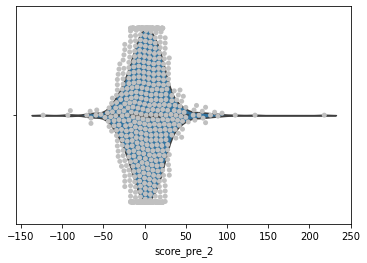

In [ ]:
ax = sns.violinplot(x="score_pre_2", data=df)
ax = sns.swarmplot(x="score_pre_2", color='silver',data=df)

In [ ]:
mean_2 = df['score_pre_2'].mean()
std_2 = df['score_pre_2'].std()

df['score_2'] = (df['score_pre_2']-mean_2)/std_2
df[['score_pre_2', 'score_2']].describe()

,score_pre_2,score_2
count,631.000000,6.310000e+02
mean,2.928685,-3.167039e-17
std,25.560069,1.000000e+00
min,-123.000000,-4.926774e+00
25%,-11.000000,-5.449392e-01
50%,2.000000,-3.633342e-02
75%,16.000000,5.113959e-01
max,218.000000,8.414348e+00


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.4% of the points cannot be placed; y

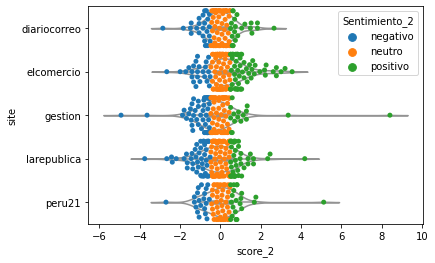

In [ ]:
df['Sentimiento_2'] = df['score_2'].apply(lambda x: 'positivo' if x>=.5 else 'negativo' if x<=-.5 else 'neutro')


ax = sns.violinplot(x="score_2", y='site', color='whitesmoke', data=df)
ax = sns.swarmplot(x="score_2", y='site', hue='Sentimiento_2', data=df)

In [ ]:
df['Sentimiento_2'].value_counts()

neutro      303
negativo    168
positivo    160
Name: Sentimiento_2, dtype: int64

In [ ]:
palabras_faltantes[:10]

['pedro',
 'castillo',
 'anunciar',
 'gobernar',
 'palacio',
 'foto',
 'twitter',
 'redacción',
 'diario',
 'correar']

In [ ]:
df[df['score']>=.5].index

Int64Index([  1,   7,  11,  18,  20,  25,  26,  30,  36,  37,
            ...
            604, 605, 606, 611, 612, 616, 624, 625, 626, 629],
           dtype='int64', length=170)

In [ ]:
df.loc[19,'content']

"“Hoy como está nuestra Constitución, una asamblea constituyente es inconstitucional”, señaló. (Foto: GEC) Redacción Diario CorreoActualizado el 29/07/2021 08:54 a.m.La presidenta del Congreso, María del Carmen Alva, consideró este miércoles que si el Poder Ejecutivo insiste en su propuesto de instaurar una asamblea constituyente ante un eventual rechazo del Parlamento Nacional, estaría cometiendo un “golpe de Estado”.En diálogo con Willax TV, prefirió “no adelantarse” a lo que haría el Legislativo en dicho escenario, pero aclaró que impulsar una medida de reforma constitucional sin pasar por el Congreso sería “inconstitucional”.MIRA: Pedro Castillo: “Ningún peruano debe denigrarse en programas de espectáculos”“[Si se insiste con una asamblea constituyente, ¿sería un golpe de Estado?] Sí, definitivamente. Todos estamos preocupados, pero todavía vamos a esperar a que llegue el proyecto de ley como él ha dicho. Va a mandar un proyecto de ley y hay que verlo en el Congreso. No nos vamos a

In [ ]:
df.loc[21,'content']

"Rondas campesinas Gabriel Mazzeigabriel.mazzei@prensmart.peActualizado el 29/07/2021 07:47 a.m.En su primer discurso como presidente de la República, Pedro Castillo Terrones tuvo dos ejes bien marcados en la lucha contra la inseguridad ciudadana: el reforzamiento de la tarea de la Policía Nacional con las rondas campesinas y la expulsión de los ciudadanos extranjeros que incurran en actos delincuenciales.MIRA AQUÍ: Pedro Castillo: estos fueron sus principales anuncios en su primer mensaje a la NaciónAnte el Congreso, Castillo dijo que si bien la Policía se esfuerza en luchar contra la delincuencia, continúan “las pandillas, las bandas, los robos callejeros y las agresiones a la integridad física de las personas y a sus vidas”.“Nosotros creemos que debemos expandir el sistema de las rondas, que no es otra cosa que la población organizada para dar seguridad a toda la población”, precisó el jefe de Estado.En esa línea, convocó a la población en general a conformar las rondas campesinas “

In [ ]:
df.loc[2,'content']

'“A 200 años de que lográramos una República libre, hoy debemos ratificar nuestro compromiso en defender esta libertad", señaló Fujimori Higuchi. (Foto: GEC) Redacción Diario CorreoActualizado el 29/07/2021 06:27 p.m.La lideresa de Fuerza Popular, Keiko Fujimori, aseguró el último miércoles que su bancada será un “muro de contención” de cara a la propuesta de una Asamblea Constituyente anunciada por el presidente Pedro Castillo en su mensaje a la Nación.MIRA AQUÍ: Pedro Castillo anuncia que no vivirá en Palacio de Gobierno y que será convertido en museo (VIDEO)A través de su cuenta de Twitter, la excandidata presidencial aseguró que su bancada apoyará “toda iniciativa” del oficialismo que se encuentre dirigida “a mejorar la calidad de vida de la población” en el Congreso.“A 200 años de que lográramos una República libre, hoy debemos ratificar nuestro compromiso en defender esta libertad. Ello implica rechazar la demagogia, la división y el odio. Desde Fuerza Popular apoyaremos toda ini